In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import  ARMA
from scipy.stats.distributions import chi2
sns.set()
import warnings
warnings.filterwarnings("ignore")

def arma(ar, ma, c, n):
    xs = []
    lar, lma = len(ar), len(ma)
    noise=np.random.random(n+max(lar, lma))
    for i in range(max(lar, lma)):
        xs.append(noise[i])
    for i in range(max(lar, lma), n+max(lar, lma)):
        x = noise[i]
        for j in range(lar):
            x+=xs[i-j-1]*ar[j]
        for j in range(lma):
            x+=noise[i-j-1]*ma[j]
        xs.append(x)
    return xs[max(lar, lma):]
    

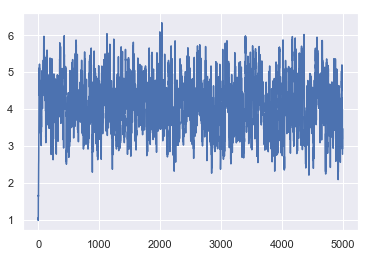

In [56]:
test = arma([0.2, .5], [0., .7, .5, .3], 0, 5000)
plt.plot(test);

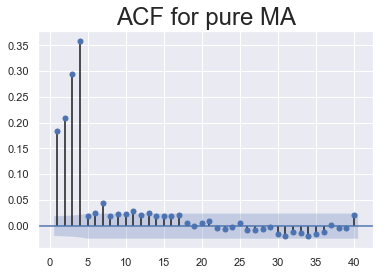

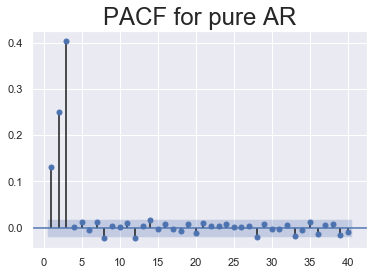

In [57]:
sgt.plot_acf(arma([], [0, .2, .4, .5], 0, 10000),zero=False,lags=40)
plt.title("ACF for pure MA", size=24);
sgt.plot_pacf(arma([0, .2, .4], [0], 0, 10000),zero=False,lags=40);
plt.title("PACF for pure AR", size=24);

It's easy with pure AR or MA models. For mixed we would need to increase grid coordinates and move around (we'll look for models with orders lower than 10 for starters):

In [90]:
def LLR_test2(L1, L2, DF=1):
    LR = 2 * (L2, L1)
    return chi2.sf(LR,DF)

In [135]:
test_model = arma([.5, .1], [.7, .5, .5], .3, 2000)
ll_map = []
AIC_map = []
BIC_map = []
for x in range(1, 6):
    lls = []
    AICs = []
    BICs = []
    for y in range(1, 6):
        try:
            fit = ARMA(test_model, order=(x,y)).fit()
            lls.append(fit.llf)
            AICs.append(fit.aic)
            BICs.append(fit.bic)
        except ValueError:
            lls.append(np.nan)
            AICs.append(np.nan)
            BICs.append(np.nan)
    ll_map.append(lls)
    AIC_map.append(AICs)
    BIC_map.append(BICs)

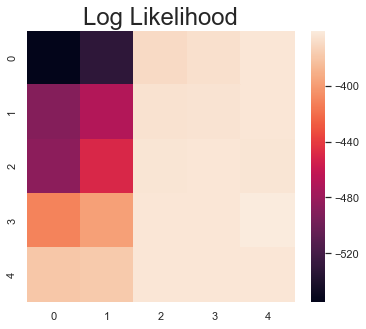

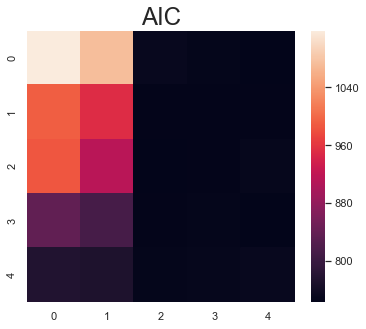

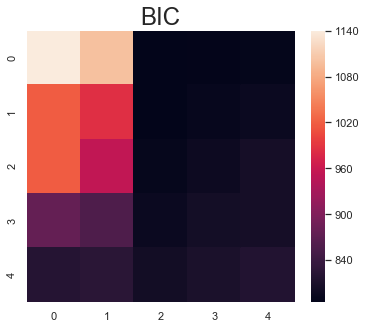

In [136]:
plt.figure(figsize=(6,5))
sns.heatmap(ll_map)
plt.title("Log Likelihood", size=24)
plt.figure(figsize=(6,5))
plt.title("AIC", size=24)
sns.heatmap(AIC_map)
plt.figure(figsize=(6,5))
plt.title("BIC", size=24)
sns.heatmap(BIC_map);

From the above, cell 1, 2 can be read (maximizing the values of AIC and BIC, minimizing of LL), which because of the indexing starting at 0 points us towards order being 2, 3 - correct!

For more complicated model and bigger range: (I might or might not have run this part only to have a reason to go watch netflix)

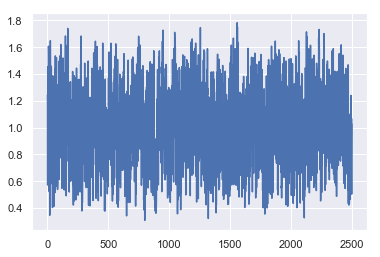

In [148]:
test_model = arma([.03, .1, .04, .2], [0, .05, .1, .1, .03], 0.1, 2500)
plt.plot(test_model);

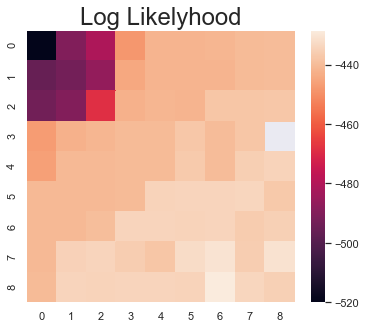

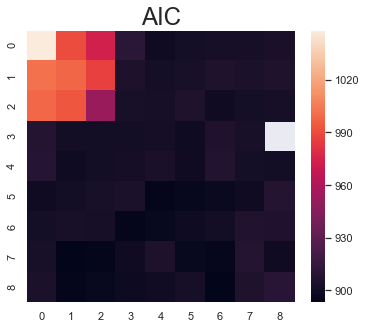

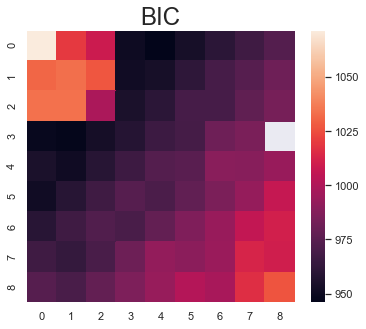

In [149]:
ll_map = []
AIC_map = []
BIC_map = []
for x in range(1, 10):
    lls = []
    AICs = []
    BICs = []
    for y in range(1, 10):
        try:
            fit = ARMA(test_model, order=(x,y)).fit()
            lls.append(fit.llf)
            AICs.append(fit.aic)
            BICs.append(fit.bic)
        except ValueError:
            lls.append(np.nan)
            AICs.append(np.nan)
            BICs.append(np.nan)
    ll_map.append(lls)
    AIC_map.append(AICs)
    BIC_map.append(BICs)

plt.figure(figsize=(6,5))
sns.heatmap(ll_map)
plt.title("Log Likelyhood", size=24)
plt.figure(figsize=(6,5))
plt.title("AIC", size=24)
sns.heatmap(AIC_map)
plt.figure(figsize=(6,5))
plt.title("BIC", size=24)
sns.heatmap(BIC_map);

Turns out it's not trivial to "see" which order is the best fit. Even knowing, that the answer is AR=4, MA=5, so the coordinates are 3,4 I wouldn't be able to explain why is that tile different. 

Although that might be because of the fact, that the coefficiencts were a bit non trivial 

|  lag    | AR   | MS   |
|:----:|:----:|:----:|
|  0   | .03  | 0    |
|  1   | .1   | .05  |
|  2   | .4   | .1   |
|  3   | .2   | .1   |
|  4   |  -    | .03  |

One more attempt, with simpler coefficients (descending to be precise):

|  lag    | AR   | MS   |
|:----:|:----:|:----:|
|  0   | .4  | 0    |
|  1   | .3   | .3  |
|  2   | .2   | .2   |
|  3   |  -   | .1   |
|  4   |  -    | .05  |

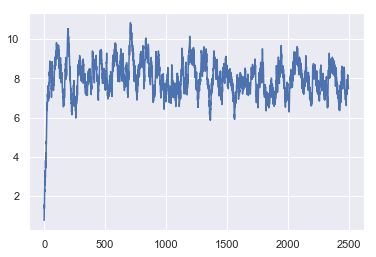

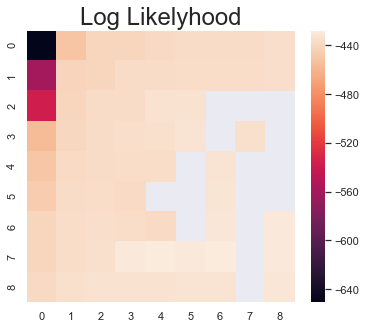

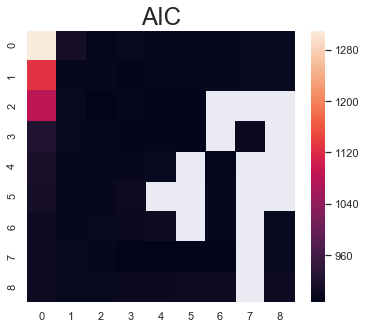

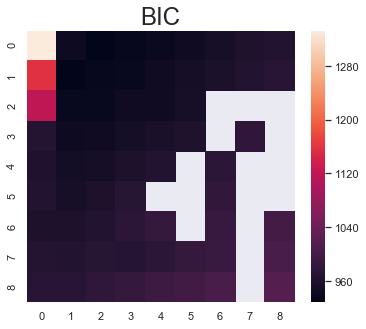

In [153]:
test_model = arma([.4, .3, .2], [0, .3, .2, .1, .05], 0.1, 2500)
plt.plot(test_model);
ll_map = []
AIC_map = []
BIC_map = []
for x in range(1, 10):
    lls = []
    AICs = []
    BICs = []
    for y in range(1, 10):
        try:
            fit = ARMA(test_model, order=(x,y)).fit()
            lls.append(fit.llf)
            AICs.append(fit.aic)
            BICs.append(fit.bic)
        except ValueError:
            lls.append(np.nan)
            AICs.append(np.nan)
            BICs.append(np.nan)
    ll_map.append(lls)
    AIC_map.append(AICs)
    BIC_map.append(BICs)

plt.figure(figsize=(6,5))
sns.heatmap(ll_map)
plt.title("Log Likelyhood", size=24)
plt.figure(figsize=(6,5))
plt.title("AIC", size=24)
sns.heatmap(AIC_map)
plt.figure(figsize=(6,5))
plt.title("BIC", size=24)
sns.heatmap(BIC_map);

Nah, I still can't see why 2,4 would be special :/